In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [28]:
df_train = pd.read_csv('Train_data.csv')
X_test_sub = pd.read_csv('Test_data.csv')

In [29]:
df_train.drop_duplicates(inplace=True)
df_train.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,59.003638,16.934223,6.504735,2.512659,5.647045,43.938412,0.241314,0.765053,19.024879,1.242091,1.742482,70.495912,0.959801,1.939536,2.895897,1.472166,0.589701,0.344304,1.150639,0.499086
std,17.204606,8.041254,4.162503,1.611190,3.424211,6.103595,0.363378,1.017742,15.532954,0.935817,1.269549,10.368922,0.771497,1.343454,2.040451,1.378816,0.386847,0.418940,0.688367,0.500228
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.407281,10.494201,3.588383,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.406374,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.203856,15.300000,5.222142,2.000000,4.600000,43.687580,0.100000,0.300000,22.500000,1.000000,1.400000,71.500000,0.700000,1.600000,2.284998,1.009757,0.500000,0.200000,0.984544,0.000000
75%,76.000000,21.841625,8.300000,3.200000,6.975000,47.700000,0.388201,1.125894,32.300000,1.600000,2.200000,77.400000,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


df_train.describe()

In [30]:
from pandas_profiling import ProfileReport


In [5]:
profile = ProfileReport(df_train)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
num_features = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV']

In [32]:
df_train[num_features].head()
len(num_features)

19

In [33]:
discrete_feature=[feature for feature in num_features if len(df_train[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 0


[]

Continuous feature Count 19


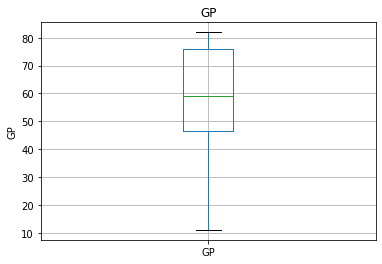

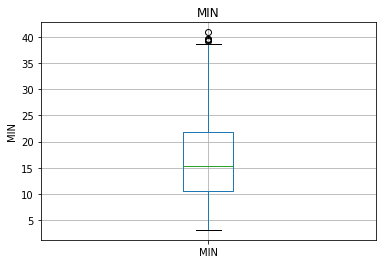

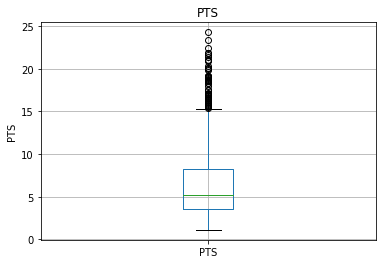

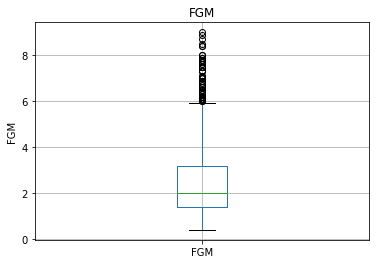

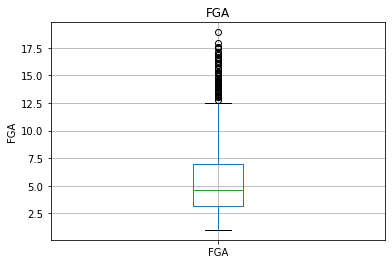

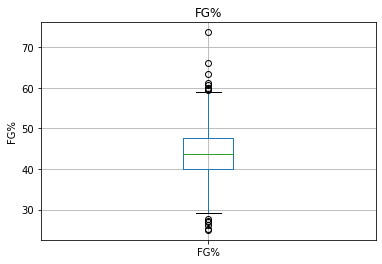

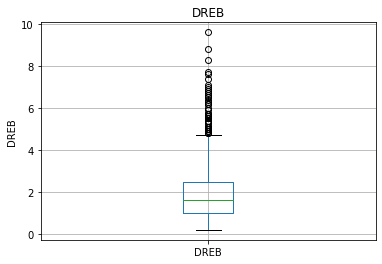

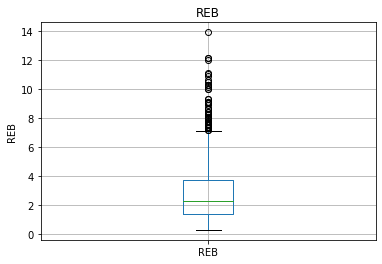

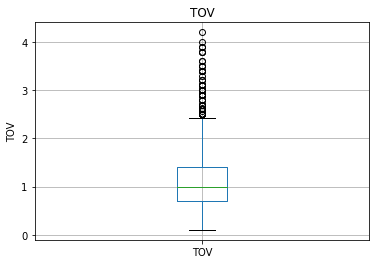

In [34]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

for feature in continuous_feature:
    data=df_train.copy()
    if 0 in df_train[feature].unique():
        pass
    else:
        df_train.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
         

/Users/harshkumar/opt/anaconda3/envs/iitg/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

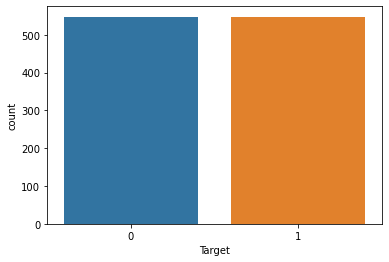

In [35]:
snb.countplot(df_train['Target'])


In [36]:
df_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [37]:
s = (df_train.dtypes == 'object')
cataegorical_cols = list(s[s].index)

print("Categorical variables:")
print(cataegorical_cols)

Categorical variables:
[]


In [38]:
X = df_train[num_features]
y = df_train['Target']

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [40]:

X_norm = X.copy()
for i in num_features:
    
    # fit on training data column
    scale = scaler.fit(X_norm[[i]])
    
    # transform the training data column
    X_norm[i] = scale.transform(X_norm[[i]])

    
X_norm.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.676056,0.256614,0.099138,0.104651,0.089385,0.533881,0.086957,0.046154,0.500,0.093333,0.078431,0.780,0.207547,0.223404,0.220588,0.047170,0.12,0.102564,0.097561
1,0.281690,0.201058,0.099138,0.093023,0.128492,0.211499,0.217391,0.323077,0.258,0.066667,0.088235,0.552,0.056604,0.095745,0.080882,0.037736,0.12,0.025641,0.024390
2,0.521127,0.164021,0.146552,0.151163,0.134078,0.507187,0.000000,0.015385,0.000,0.160000,0.186275,0.615,0.075472,0.063830,0.066176,0.075472,0.20,0.102564,0.219512
3,0.971831,0.650794,0.435345,0.360465,0.469274,0.254620,0.565217,0.630769,0.329,0.373333,0.323529,0.850,0.150943,0.148936,0.154412,0.367925,0.52,0.025641,0.512195
4,0.661972,0.404762,0.202586,0.174419,0.240223,0.240246,0.000000,0.015385,0.250,0.253333,0.303922,0.617,0.094340,0.053191,0.066176,0.179245,0.44,0.051282,0.390244


In [41]:
from sklearn.preprocessing import StandardScaler
X_stand = X.copy()
for i in num_features:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])
    
X_stand.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,-0.000212,-0.514362,-0.746223,-0.752992,-0.890260,1.157485,-0.113745,-0.457155,1.995067,-0.579535,-0.742715,0.724041,0.181806,0.268434,0.198136,-0.705396,-0.749219,0.133006,-0.945625
1,-1.628427,-0.775635,-0.746223,-0.815087,-0.685740,-1.415946,0.712218,1.312275,0.436377,-0.793350,-0.663910,-1.475844,-0.855613,-0.625194,-0.733456,-0.777955,-0.749219,-0.583414,-1.381639
2,-0.639868,-0.949816,-0.481838,-0.504615,-0.656523,0.944398,-0.664388,-0.653759,-1.225368,-0.044998,0.124131,-0.867981,-0.725936,-0.848601,-0.831518,-0.487718,-0.231982,0.133006,-0.218936
3,1.220950,1.339430,1.128507,0.613083,1.096507,-1.071729,2.914789,3.278309,0.893679,1.665519,1.227389,1.399444,-0.207226,-0.252849,-0.243144,1.761616,1.836966,-0.583414,1.525119
4,-0.058362,0.182365,-0.169383,-0.380426,-0.101397,-1.186468,-0.664388,-0.653759,0.384850,0.703353,1.069781,-0.848684,-0.596259,-0.923070,-0.831518,0.310433,1.319729,-0.344608,0.798429


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm,y,test_size=0.25,random_state=42)
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand,y,test_size=0.25,random_state=42)

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score

In [44]:
def score(model,X_tr, y_tr, X_tst,y_tst, title = "Default"):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_tst)
    accuracy = round(accuracy_score(y_tst, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [45]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg,X_train_stand, y_train_stand, X_test_stand,y_test_stand,  "Logistic Regression")

Accuracy for Logistic Regression : 0.70073 



In [68]:
rf = RandomForestClassifier(n_estimators=3000,max_depth = 25,random_state = 42)#(n_estimators=1000,max_depth=10,random_state=0)
score(rf,X_train, y_train, X_test,y_test,"Random Forest")

Accuracy for Random Forest : 0.70803 



In [47]:
# Naive Bayes: GaussianNB
#YOUR CODE HERE
gnb = GaussianNB()
score(gnb,X_train_stand, y_train_stand, X_test_stand,y_test_stand,"GaussianNB")

# KNN: KNeighborsClassifier
#YOUR CODE HERE
knc = KNeighborsClassifier()
score(knc,X_train_stand, y_train_stand, X_test_stand,y_test_stand,"KNeighborsClassifier")

# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE
dtc = DecisionTreeClassifier()
score(dtc,X_train_stand, y_train_stand, X_test_stand,y_test_stand,"DecisionTreeClassifier")

Accuracy for GaussianNB : 0.71898 

Accuracy for KNeighborsClassifier : 0.71898 

Accuracy for DecisionTreeClassifier : 0.65328 



In [48]:
gnb = GaussianNB()
score(gnb,X_train, y_train, X_test,y_test,"GaussianNB")

rf = RandomForestClassifier(n_estimators=100,max_depth=1000,random_state=0)
score(rf,X_train, y_train, X_test,y_test,"Random Forest")

Accuracy for GaussianNB : 0.71898 

Accuracy for Random Forest : 0.71533 



In [49]:
clf_svm = svm.SVC(random_state = 2022, C=5, gamma='scale', kernel='rbf', probability=True)
score(clf_svm,X_train, y_train, X_test,y_test,"SVM")

Accuracy for SVM : 0.69343 



In [50]:
xgbrf = XGBRFClassifier(n_estimators=500,learning_rate=0.1)
score(xgbrf,X_train, y_train, X_test,y_test,"XGBRFClassifier")

Accuracy for XGBRFClassifier : 0.66058 



In [59]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,350],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,2100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,270]
        }
    }
}

In [60]:
scores = []
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.701220,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.734146,{'n_estimators': 2100}
2,logistic_regression,0.693902,{'C': 5}


In [182]:
pred_test = rf.predict(X_test_sub)
pred_test
pd.DataFrame(pred_test).to_csv('sample.csv')
ans = pd.read_csv('sample.csv')
ans.head(10)



,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,0
6,6,1
7,7,0
8,8,0
9,9,0


In [183]:
ans.rename(columns = {'0':'prediction'}, inplace = True)
ans.head()

,Unnamed: 0,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [184]:
print(ans.columns)

Index(['Unnamed: 0', 'prediction'], dtype='object')


In [185]:
ans.drop(['Unnamed: 0'], axis = 1,inplace = True)

In [186]:
ans.head()

,prediction
0,0
1,0
2,0
3,0
4,1


In [187]:
ans.to_csv('result.csv',index= False)